In [1]:
from astropy.io import fits
from astropy.table import Table
import astropy.units as u
from astropy.io.fits import getheader

import sys
import numpy as np

from specutils import Spectrum1D
from astrodb_utils.spectra import check_spectrum_plottable
from astrodb_utils.fits import add_missing_keywords, add_observation_date, add_wavelength_keywords, check_header

In [89]:
#Read in the wavelength, flux, and error from the file

irtf_filename = '/Users/arothermich/Desktop/Research/Projects/Roth24/ManuscriptSubmission/Spectra/Secondary/tspec4-merged_J2029-7910B_20211023.fits'
hdul = fits.getdata(irtf_filename, ignore_missing_simple=True)
wave=hdul[0]  * u.micron
flux=hdul[1 ]* u.Unit('erg / (cm2 s angstrom)')
err=hdul[2] * u.Unit('erg / (cm2 s angstrom)')

###############################################
#If Kast Spectrum:
# hdul = fits.open('/Users/arothermich/Desktop/Research/Projects/Roth24/ManuscriptSubmission/Spectra/Secondary/kastRED_J1744+2304B_20210517.fits',ignore_missing_simple=True,do_not_scale_image_data=True)
# wave, flux, err = hdul[0].data
# wave=wave  * u.micron
# flux=flux* u.Unit('erg / (cm2 s angstrom)')
# err=err * u.Unit('erg / (cm2 s angstrom)')
###############################################

#Set-up a table with the spectra values
table = Table([wave.value, flux.value, err.value],
              names=('wavelength', 'flux', 'flux_error'))
primary_hdu = fits.PrimaryHDU() 
hdu = fits.BinTableHDU(table)  #turn our table into a binary fits format

# Add the header info for our units
hdu.header['TUNIT1'] = 'um'                   
hdu.header['TUNIT2'] = 'erg / (cm2 s angstrom)'    
hdu.header['TUNIT3'] = 'erg / (cm2 s angstrom)'     

#Write the file into a fits file. 
hdul = fits.HDUList([primary_hdu, hdu])
hdul.writeto('/Users/arothermich/Desktop/Research/Projects/SIMPLE/Converted_Spectra/AUS-2029-7910.fits', overwrite=True)

 ############################## Xspextool History ############################## [astropy.io.fits.card]
 ############################## Xcombspec History ############################## [astropy.io.fits.card]
 ############################### Xtellcor History ############################## [astropy.io.fits.card]
 ############################# Xmergeorders History ############################ [astropy.io.fits.card]


In [90]:
# Now we are going  to update all of the header information
hdul = fits.open('/Users/arothermich/Desktop/Research/Projects/SIMPLE/Converted_Spectra/AUS-2029-7910.fits',  mode='update')
header = hdul[0].header

#Setting Header Values
header.set('OBJECT', "CWISE J202934.80-791013.1")
header.set('DATE-OBS', "2021-10-23")
header.set('INSTRUME', "TS4")
header.set('TELESCOP', "SOAR")
# header.set('RA_TARG', "17:44:26.81")
# header.set('DEC_TARG', "23:03:54.9")
header.set('OBSERVER', 'Burgasser')
# header.set('SLIT', '0.8x15')
# header.set('GRAT', 'PRISM')
header.set('AIRMASS', '1.56')
header.set('ITOT', '1200')
header.set('AUTHOR', "Rothermich et al 2024")
header.set('TITLE', "89 New Ultracool Dwarf Co-Moving Companions Identified With The Backyard Worlds: Planet 9 Citizen Science Project")
header.set('VOREF', "10.3847/1538-3881/ad324e")
header.set('VOPUB', "SIMPLE Archive")
header.set('CONTRIB1', "Austin Rothermich")

# Save changes to the file in-place
hdul.flush()

# Close the FITS file
hdul.close()
# check_header(header)
# add_missing_keywords(header=header)

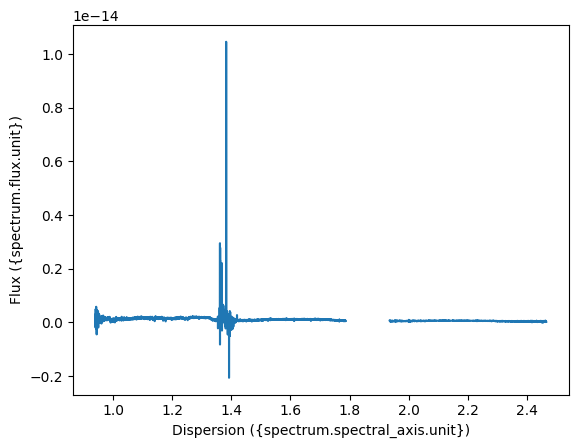

True

In [91]:
#Now we will check to make sure the new file can be read into simple! 
spec1d = Spectrum1D.read('/Users/arothermich/Desktop/Research/Projects/SIMPLE/Converted_Spectra/AUS-2029-7910.fits')
# spec1d = Spectrum1D.read('/Users/arothermich/Desktop/Research/Projects/Roth24/ManuscriptSubmission/Spectra/Secondary/J0657+1633.fits')
check_spectrum_plottable(spec1d, show_plot=True)